In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from skimage import filters

In [3]:
# 1. Create a synthetic grayscale image
def create_synthetic_image(height=200, width=300):
    image = np.zeros((height, width), dtype=np.uint8)

    # Object 1: rectangle with pixel value 100
    image[50:120, 50:150] = 100

    # Object 2: rectangle with pixel value 200
    image[80:160, 180:270] = 200

    return image

In [4]:
# 2. Add Gaussian noise
def add_gaussian_noise(image, mean=0, std=20):
    noise = np.random.normal(mean, std, image.shape)
    noisy_img = image + noise
    noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)
    return noisy_img

In [5]:
# 3. Apply Otsu's thresholding
def apply_otsu_threshold(image):
    # OpenCV method
    _, thresh_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Skimage method (optional)
    otsu_thresh = filters.threshold_otsu(image)
    binary_img = (image > otsu_thresh).astype(np.uint8) * 255

    return thresh_img, binary_img, otsu_thresh

In [6]:
# 4. Run the pipeline
original_img = create_synthetic_image()
noisy_img = add_gaussian_noise(original_img)
otsu_cv, otsu_sk, threshold_value = apply_otsu_threshold(noisy_img)

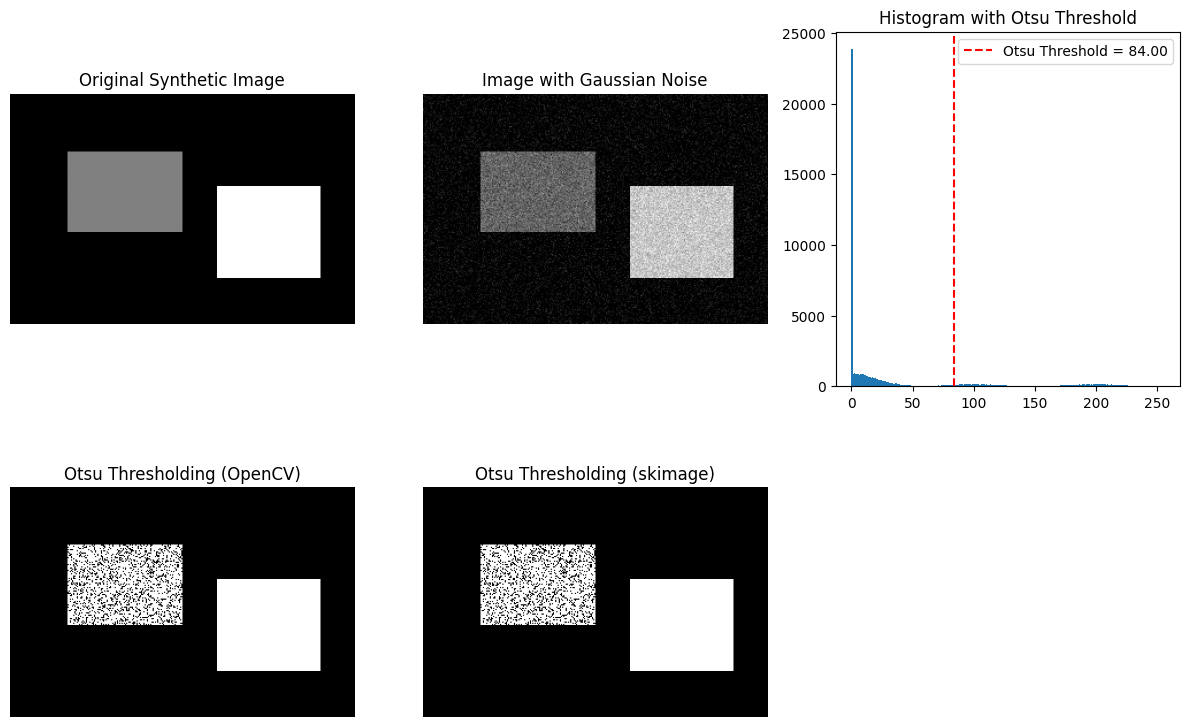

In [7]:
# 5. Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original Synthetic Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_img, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.hist(noisy_img.ravel(), bins=256, range=(0, 256))
plt.axvline(threshold_value, color='r', linestyle='--', label=f'Otsu Threshold = {threshold_value:.2f}')
plt.title("Histogram with Otsu Threshold")
plt.legend()

plt.subplot(2, 3, 4)
plt.imshow(otsu_cv, cmap='gray')
plt.title("Otsu Thresholding (OpenCV)")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(otsu_sk, cmap='gray')
plt.title("Otsu Thresholding (skimage)")
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
result_dir = os.path.join("..", "results", "task_01")
os.makedirs(result_dir, exist_ok=True)

cv2.imwrite(os.path.join(result_dir, "01_original_synthetic.jpg"), original_img)
cv2.imwrite(os.path.join(result_dir, "02_gaussian_noise.jpg"), noisy_img)
cv2.imwrite(os.path.join(result_dir, "03_otsu_opencv.jpg"), otsu_cv)
cv2.imwrite(os.path.join(result_dir, "04_otsu_skimage.jpg"), otsu_sk)

True